#### **Exercise 1:**

The `titanic` dataset is widely used in ML courses.  The 'stakeholder problem' is to predict whether or not a person was likely to survive given the available data.  We'll use it here for a few problems to get used to pre-processing. First, let's do some EDA.  Load the data in and use a scatter plot matrix to visualize just the numeric columns.  Look critically at your results.  What have you learned?  What would you like to know that this analysis doesn't tell you?

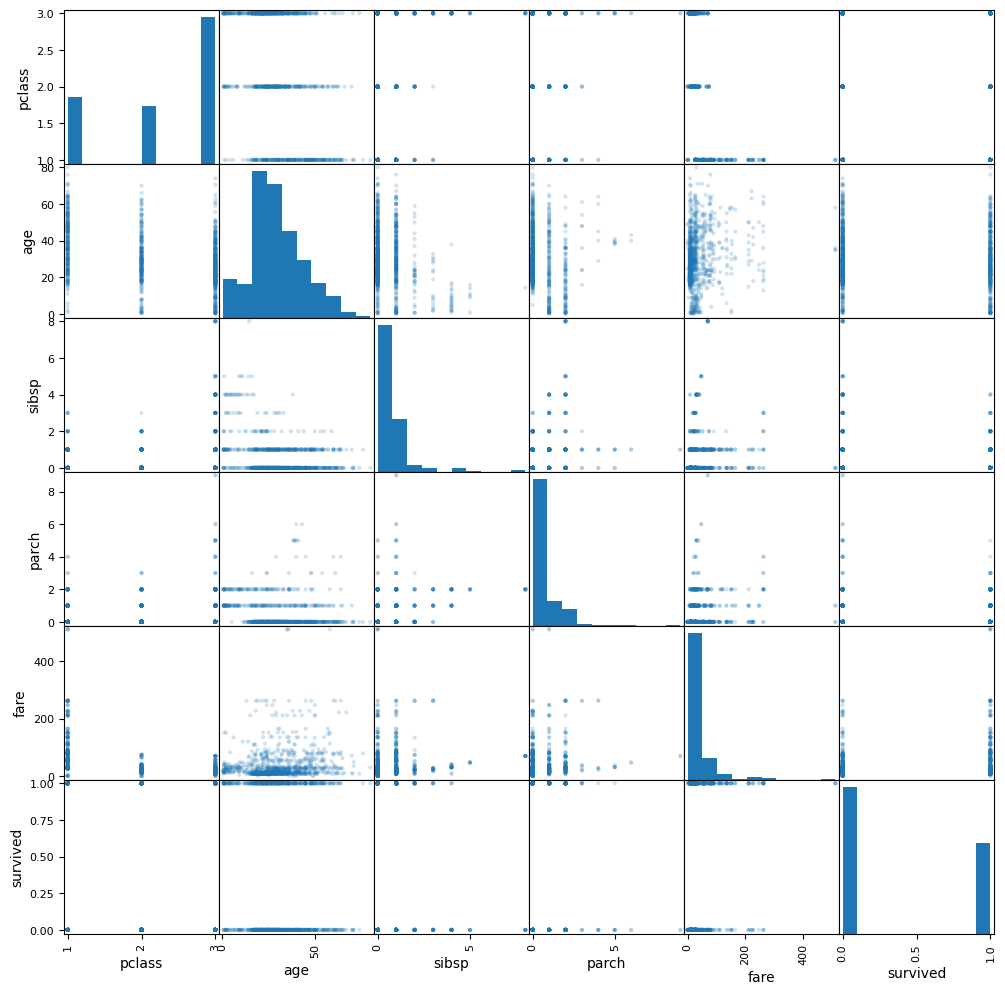

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

file_path = "data/titanic.csv"

# Read the CSV file into a DataFrame
titanic = pd.read_csv(file_path)

numeric_columns = titanic.select_dtypes(include=['number'])
scatter_matrix(numeric_columns, alpha=0.2, figsize=(12, 12), diagonal='hist')

# Show the plot
plt.show()

titanic.head()

titanic.info()





#### **Exercise 2:**

It's zero cost to build a scatter matrix, but sometimes it only helps to highlight what you *don't* know. In addition to identifying correlations (or lack thereof) we'd also like to get a sense of the predictive power of different features.  Figure out how to use histogram plots to look at survival rates by age, pclass, and gender.

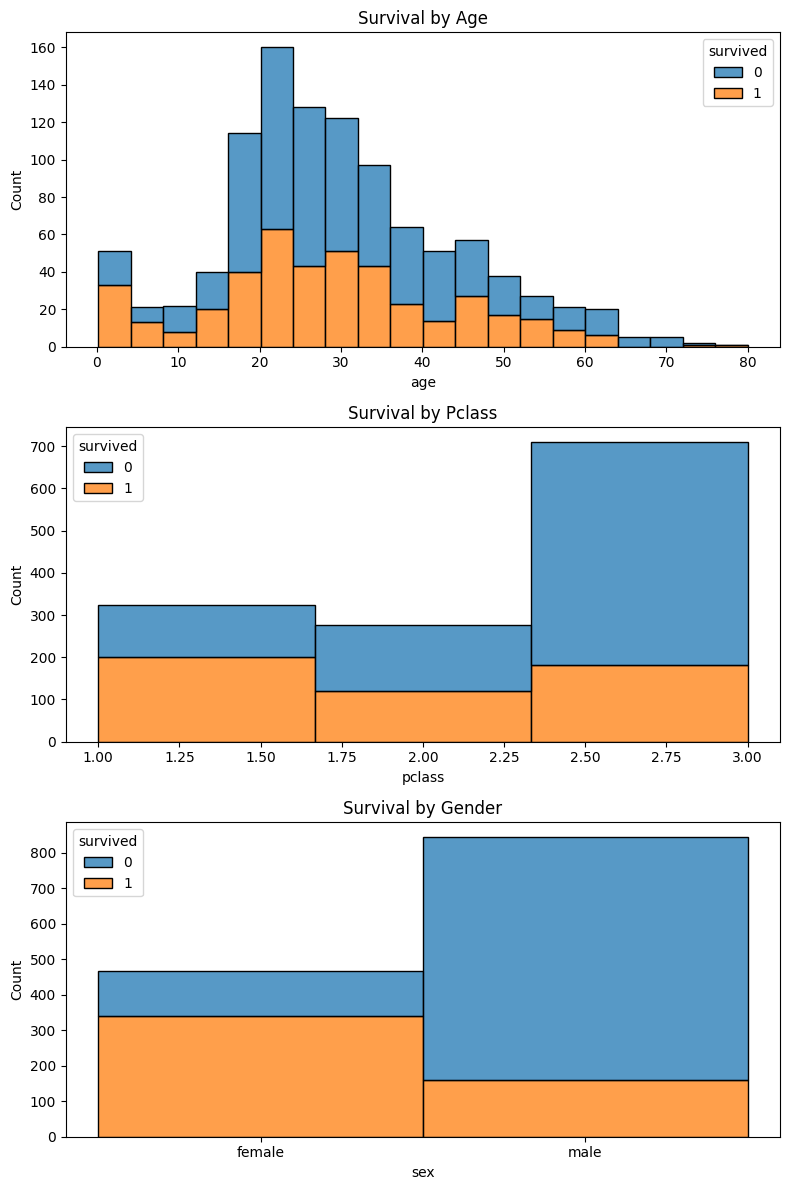

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set up subplots for each category
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# Histogram of survival rates by Age
sns.histplot(data=titanic, x='age', hue='survived', multiple='stack', bins=20, ax=axes[0])
axes[0].set_title('Survival by Age')

# Histogram of survival rates by Pclass
sns.histplot(data=titanic, x='pclass', hue='survived', multiple='stack', bins=3, ax=axes[1])
axes[1].set_title('Survival by Pclass')

# Histogram of survival rates by Gender
sns.histplot(data=titanic, x='sex', hue='survived', multiple='stack', bins=2, ax=axes[2])
axes[2].set_title('Survival by Gender')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

#labels, 
#titanic['gender'] = labels
#titanic[['age', 'survived']].plot.hist(by='survived')

#### **Exercise 3:**

Examine your data for NAs.  For the features that you think are likely to matter given your initial analysis, use an imputer to fill in the missing values. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.

In [20]:
import pandas as pd
from sklearn.impute import SimpleImputer

features_to_impute = ['age', 'fare']

# Create a SimpleImputer instance (you can customize the strategy)
imputer = SimpleImputer(strategy='mean')

# Impute missing values for selected features
titanic[features_to_impute] = imputer.fit_transform(titanic[features_to_impute])

df = titanic.drop(columns='cabin', axis=1)

df = df.dropna(subset='embarked')

df.isna().sum()

pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
survived    0
dtype: int64

#### **Exercise 4**

Recall that sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

#### **Exercise 5**

Using 5-fold cross-validation, compare the performance of a LogisticRegression classifier with that of a DecisionTree classifier.

_Note, the following exercises use the housing data introduced in this week's lecture notes._

#### **Exercise 6:** 

Using the housing data introduced with the end-to-end example this week, try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the [documentation](https://scikit-learn.org/stable/modules/svm.html) if you are interested). Use GridSearchCV to explore the parameter space. How does the best `SVR` predictor perform?

#### **Exercise 7:**

Try replacing the `GridSearchCV` with a `RandomizedSearchCV`.

#### **Exercise 8:**

Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes.  Use a `RandomForestRegressor` to drive the feature selection process.